# Efficient Frontier - Stock Valuation

`Part 1: Performance Measurement`

Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors, all expressed as a percentage. These observations cover the ten-year period from Jan 2004 through Dec 2013.

Using excess returns for the ten industry portfolios, calculate the following performance metrics:

- Sharpe ratio
- Sortino ratio (with risk-free rate as target)
- Treynor ratio
- Jensen's alpha
- Three-factor alpha
`Create a table` showing the `performance metrics` for the `ten industry portfolios`. Also plot your results as a `bar chart` for `each performance metric`. `Briefly explain` the `economic significance` of each performance metric.

`Part 2: Minimum-Variance Frontier Revisited`

Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. 

Without short sales, portfolio weights will be limited to the range [0, 1]. Randomly draw each element of w, the vector of portfolio weights, from the uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one.

Use the normalized w to calculate the mean return and standard deviation of return. Repeat this process until you have at least 10^5 observations. `Plot the points` with `mean return` on the vertical axis and `standard deviation` of return on the horizontal axis to show the minimum-variance frontier.

Repeat this entire process by simulating 1/w using the standard uniform distribution: i.e., take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight . Plot your results to show the minimum-variance frontier on a `separate graph`.

Please submit your results and programming code, as (uncompressed) MS Word or Adobe PDF, to the submission folder for Homework 3 before 7 pm on Wednesday, 4 November.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline


In [17]:
df_1 = pd.read_excel("Industry_Portfolios.xlsx").set_index("Date")
df_3 = pd.read_excel("Risk_Factors.xlsx").set_index("Date")
df = pd.merge(df_1,df_3,left_index=True, right_index=True)

In [18]:
df.tail()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Rf,Rm-Rf,SMB,HML
Date,,,,,,,,,,,,,,
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,0.0,-2.69,0.29,-2.46
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,0.0,3.76,2.85,-1.59
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,0.0,4.17,-1.56,1.31
201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74,0.0,3.12,1.34,-0.33
201312,2.65,1.18,3.13,2.95,4.04,3.96,0.20,0.71,1.79,3.11,0.0,2.81,-0.43,-0.15


### Part 1: Performance Measurement

**Calculate Sharp Ratio**      E[Ri - μi] / σi

In [19]:
sharp_ratio = []
for i in np.arange(10):
    exp = (df.iloc[:,i] - df.iloc[:,10] ).mean()
    std = (df.iloc[:,i] - df.iloc[:,10] ).std()
    s_r = exp / std
    sharp_ratio.append(s_r)

In [20]:
Performance = pd.DataFrame(sharp_ratio, columns = ["Sharp_ratio"]).set_index(df.columns[:10])

In [21]:
Performance

,Sharp_ratio
NoDur,0.231099
Durbl,0.072356
Manuf,0.166616
Enrgy,0.181708
HiTec,0.118552
Telcm,0.169064
Shops,0.191753
Hlth,0.172529
Utils,0.210948
Other,0.064693


**Calculate Jensen_alpha** using OLS regression

In [22]:
Jensen_alpha = [] 
beta = [] # this beta is fore calculation of Treynor Ratio
x = df['Rm-Rf'] # Market Premium (Rm - Rf)
x = sm.add_constant(x)
for i in np.arange(10):
    y = df.iloc[:,i] - df.iloc[:,10]  # Excess Return (Ri - Rf)
    results = sm.OLS(y,x).fit()
    Jensen_alpha.append(results.params[0])
    beta.append(results.params[1])

In [23]:
beta

[0.6537436627124877,
 1.6493741867918783,
 1.1679286302170713,
 0.9655272672387547,
 1.1323869931662878,
 0.901721297379235,
 0.8295153084551162,
 0.6758903520816556,
 0.5370092894809594,
 1.2069923816664667]

**Calculate Treynor Ratio**

Treynor Ratio = E[Ri - Rf] / Beta

In [24]:
# Expected Risk Premium
ERPs = [] 

for i in np.arange(10):
    ERP = (df.iloc[:,i] - df.iloc[:,10]).mean()
    ERPs.append(ERP)

In [25]:
Treynor_ratio = [x/y for x, y in zip(ERPs,beta)]
Treynor_ratio

[1.1863722397174963,
 0.3674626038086591,
 0.7582512410614842,
 1.1433303896467706,
 0.564294718904604,
 0.8363633739810499,
 0.9512583134878089,
 0.9714346880542696,
 1.4523336596662728,
 0.29978095871140326]

**Calculate Sortino Ratio**

Sortino_ratio = E[Ri - Rt] / sqrt(downside risk)

In [26]:
#Exected Deviation from "target return" (in this case is Rf)
extected_devs = []

for i in np.arange(10):
    expected_dev = (df.iloc[:,i] - df.iloc[:,10]).mean()
    extected_devs.append(expected_dev)

In [27]:
#First calculate downside risk
downside_risks = []

for i in np.arange(10):
    re = (df.iloc[:,i] - df.iloc[:,10])  # calculate excess return
    downside_risk = (re[re<0]**2).sum() / len(re)  #calculate downside risk (if re is lower than 0, raise to the power of 2 and subtract by the number of observations)
    downside_risks.append(downside_risk)

In [28]:
np.sqrt(downside_risks)

array([2.21087275, 5.4130746 , 3.67066445, 4.03461182, 3.74515554,
       3.07898576, 2.69282751, 2.42914577, 2.68896386, 4.14229435])

#### Sortino_ratio = extected_devs/np.sqrt(downside_risks)
Sortino_ratio

In [29]:
Sortino_ratio = extected_devs/np.sqrt(downside_risks)

**Three-factor alpha**

In [30]:
Three_factor_alpha = []

for i in np.arange(10):
    y = df.iloc[:,i] - df.iloc[:,10] 
    x = df.iloc[:,11:14]
    
    x_sm = sm.add_constant(x)
    model = sm.OLS(y,x_sm)
    result = model.fit()
    Three_factor_alpha.append(result.params[0])

**Consolidate the results into dataframe**

In [31]:
Performance["Jensen_alpha"] = Jensen_alpha

In [32]:
Performance["Treynor_ratio"] = Treynor_ratio

In [33]:
Performance["Sortino_ratio"] = Sortino_ratio

In [34]:
Performance["Three_factor_alpha"] = Three_factor_alpha

In [35]:
Performance

,Sharp_ratio,Jensen_alpha,Treynor_ratio,Sortino_ratio,Three_factor_alpha
NoDur,0.231099,0.369717,1.186372,0.350804,0.386704
Durbl,0.072356,-0.417903,0.367463,0.111967,-0.474342
Manuf,0.166616,0.160494,0.758251,0.241260,0.153285
Enrgy,0.181708,0.504485,1.143330,0.273612,0.523007
HiTec,0.118552,-0.064024,0.564295,0.170620,-0.065979
Telcm,0.169064,0.194348,0.836363,0.244940,0.200724
Shops,0.191753,0.274093,0.951258,0.293032,0.255941
Hlth,0.172529,0.236968,0.971435,0.270294,0.257472
Utils,0.210948,0.446523,1.452334,0.290044,0.474411
Other,0.064693,-0.387508,0.299781,0.087351,-0.404412


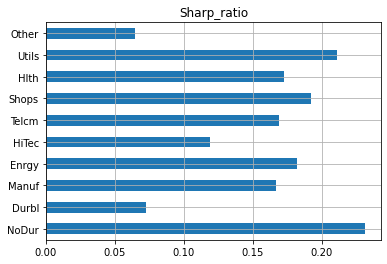

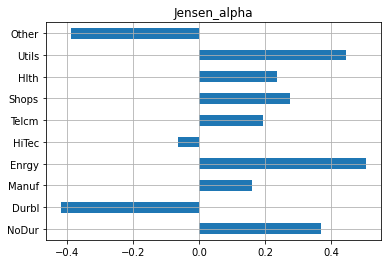

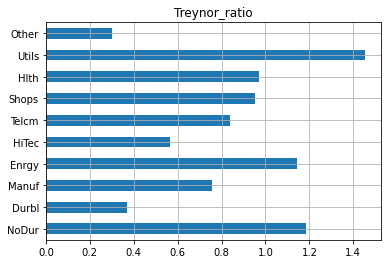

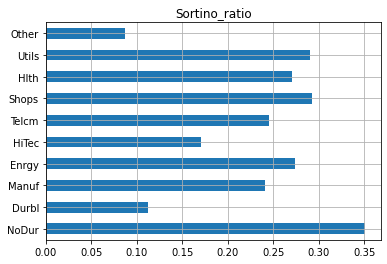

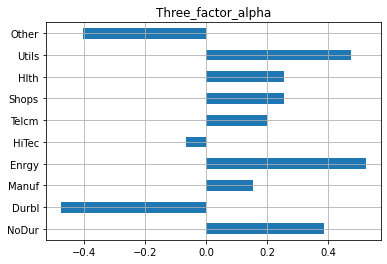

In [36]:
#plot results into bar chart
for i in np.arange(5):
    Performance.T.iloc[i,:].plot(kind= "barh", title = Performance.T.index[i])
    plt.grid()
    plt.show()

### Part 2: Minimum-Variance Frontier Revisited

In [37]:
data_df_std = df_1.std()
data_df_return = df_1.mean()
assets = pd.concat([data_df_return, data_df_std], axis = 1)
assets.columns = ["Returns", "Volatility"]
print("Mean Return and Standard Deviation of 10 portfolio")
assets

Mean Return and Standard Deviation of 10 portfolio


,Returns,Volatility
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [38]:
cov_matrix = df_1.cov()
cov_matrix

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [39]:
def port_ret(weights):
    return np.sum(assets.Returns*weights)
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [50]:
p_rets = []
p_vols = []
num_assets = len(df_1.columns) # calculate the numebr of assets in the data frame by taking number of columns

In [51]:
for i in range (10**5):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    p_rets.append(port_ret(weights))
    p_vols.append(port_vol(weights))
prets = np.array(p_rets)
pvols = np.array(p_vols)

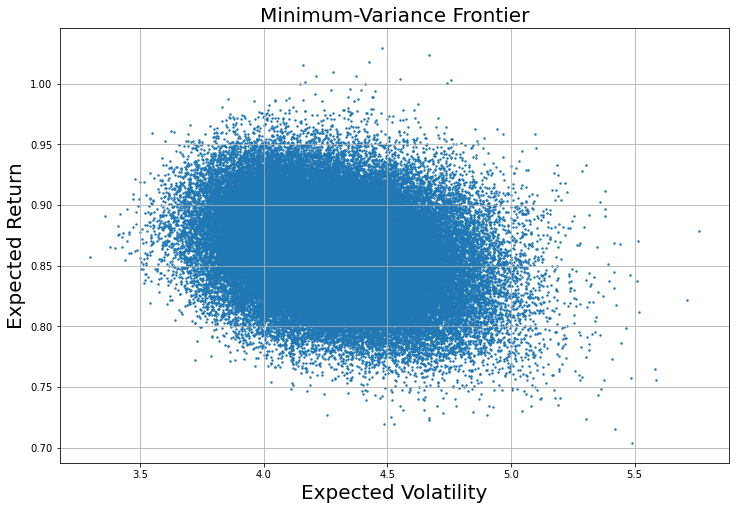

In [52]:
plt.figure(figsize=(12,8))

plt.scatter(pvols, prets, s = 2)

plt.xlabel('Expected Volatility', fontsize = 20)
plt.ylabel('Expected Return', fontsize = 20)
plt.title("Minimum-Variance Frontier", fontsize = 20)

plt.grid(True)
plt.show()

In [43]:
p_rets = []
p_vols = []

In [44]:
for i in range (10**5):
    weights = 1 / np.random.random(num_assets)
    weights /= np.sum(weights)
    
    p_rets.append(port_ret(weights))
    p_vols.append(port_vol(weights))
prets = np.array(p_rets)
pvols = np.array(p_vols)

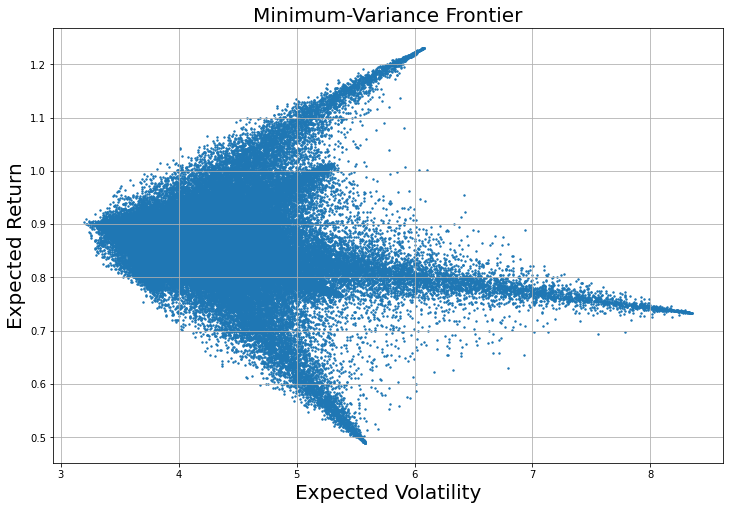

In [47]:
plt.figure(figsize=(12,8))

plt.scatter(pvols, prets, s = 2)

plt.xlabel('Expected Volatility', fontsize = 20)
plt.ylabel('Expected Return', fontsize = 20)
plt.title("Minimum-Variance Frontier", fontsize = 20)

plt.grid(True)
plt.show()